In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import datetime
import yfinance as yf 
import streamlit as st

In [9]:
# start = '2010-01-01'
# end = '2021-12-31'

# #st.title(Stock Trend Predecion)


# #user_input = st.text_input('Enter Stock Ticker', 'AAPL')
# df = data.DataReader('AAPL', 'yahoo', start, end)
# df.head()

In [14]:
# Loading the stock data form csv file.
stocks = pd.read_csv("EQUITY_L.csv")
selected_stock = st.sidebar.selectbox("Select Dataset for Prediction,", stocks)
tickerData = yf.Ticker(selected_stock) # Get ticker data

# @st.cache(allow_output_mutation=True)
# @st.cache
def load_data(ticker):
    df = yf.download(ticker, start, end)
    df.reset_index(inplace=True)
    return df

df = load_data(selected_stock)

[*********************100%***********************]  1 of 1 completed


In [15]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2955,2021-12-24,58.500000,58.500000,55.500000,55.849998,55.849998,192527
2956,2021-12-27,56.049999,61.349998,54.700001,57.099998,57.099998,521125
2957,2021-12-28,58.700001,60.500000,57.900002,59.750000,59.750000,645111
2958,2021-12-29,60.750000,60.900002,58.049999,59.599998,59.599998,314791
2959,2021-12-30,59.599998,63.599998,59.349998,62.349998,62.349998,2815655


In [16]:
# df = df.reset_index()
# df.head()

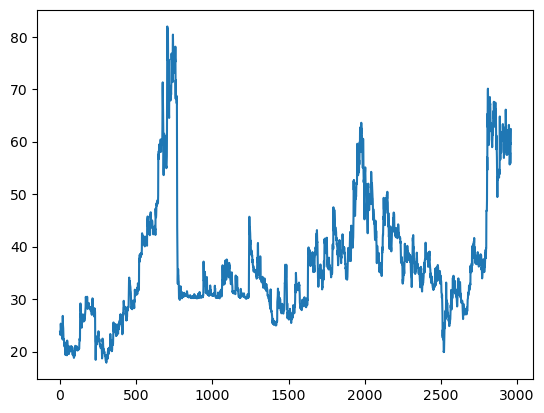

In [17]:
plt.plot(df.Close)

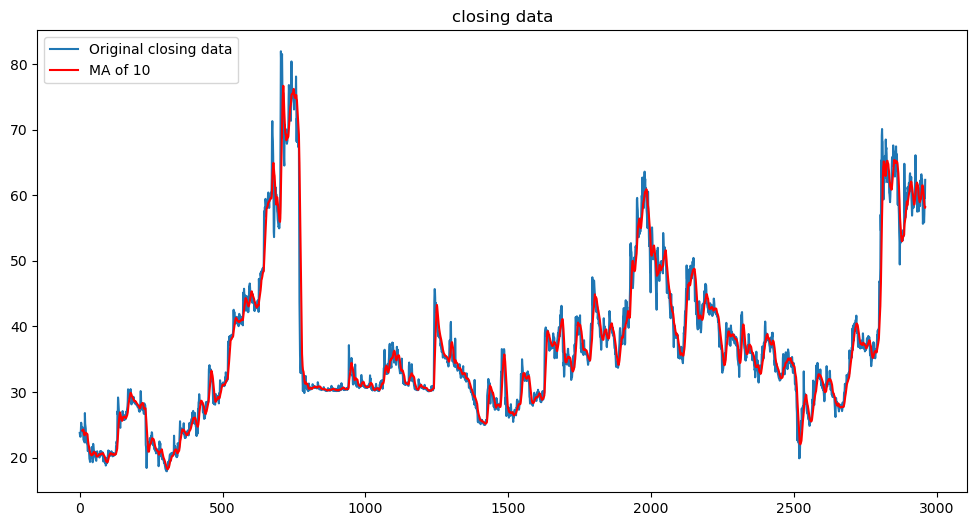

In [22]:
ma10 = df.Close.rolling(10).mean()
ma10
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.title("closing data")
plt.plot(ma10, "r")
plt.legend(["Original closing data", "MA of 10"],loc ="upper left")


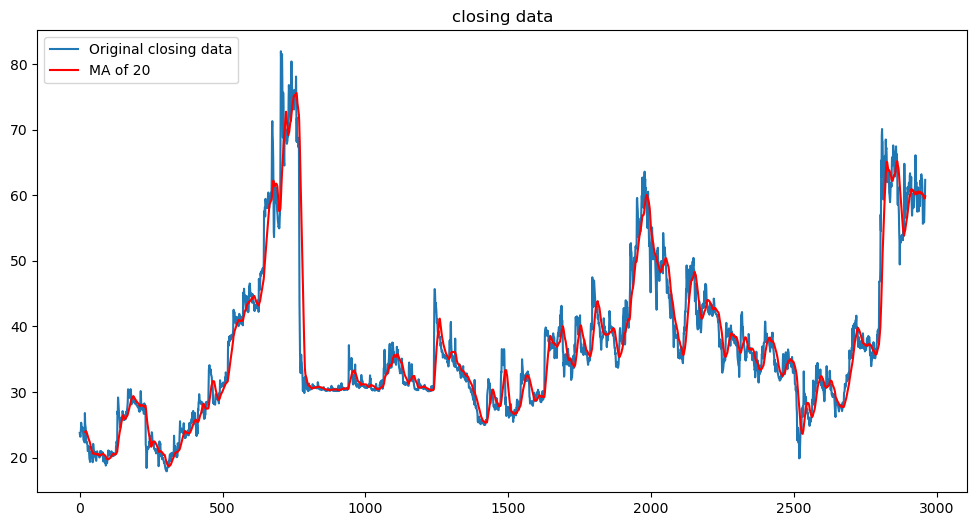

In [23]:
ma20 = df.Close.rolling(20).mean()
ma20
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.title("closing data")
plt.plot(ma20, "r")
plt.legend(["Original closing data", "MA of 20"],loc ="upper left")


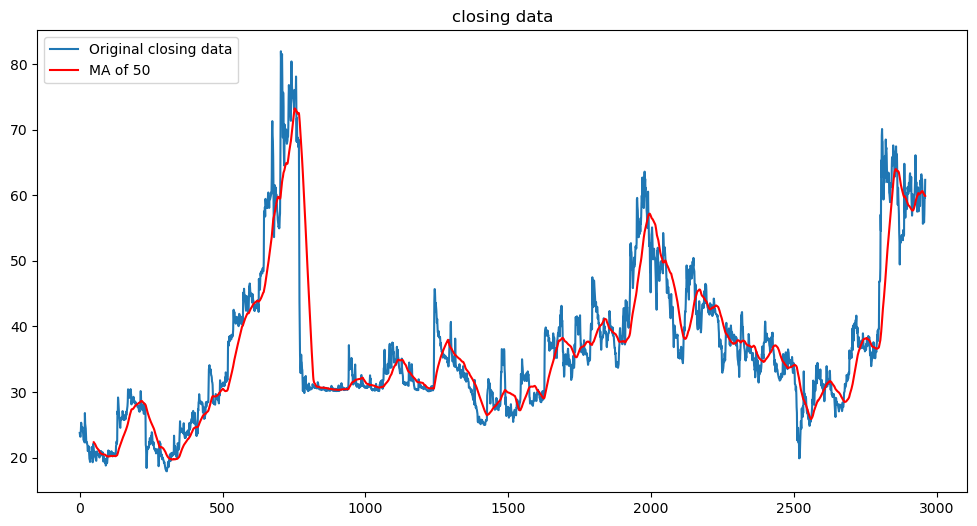

In [24]:
ma50 = df.Close.rolling(50).mean()
ma50
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.title("closing data")
plt.plot(ma50, "r")
plt.legend(["Original closing data", "MA of 50"],loc ="upper left")


In [18]:
ma100 = df.Close.rolling(100).mean()
ma100

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
2955    59.186
2956    59.091
2957    59.014
2958    58.951
2959    58.937
Name: Close, Length: 2960, dtype: float64

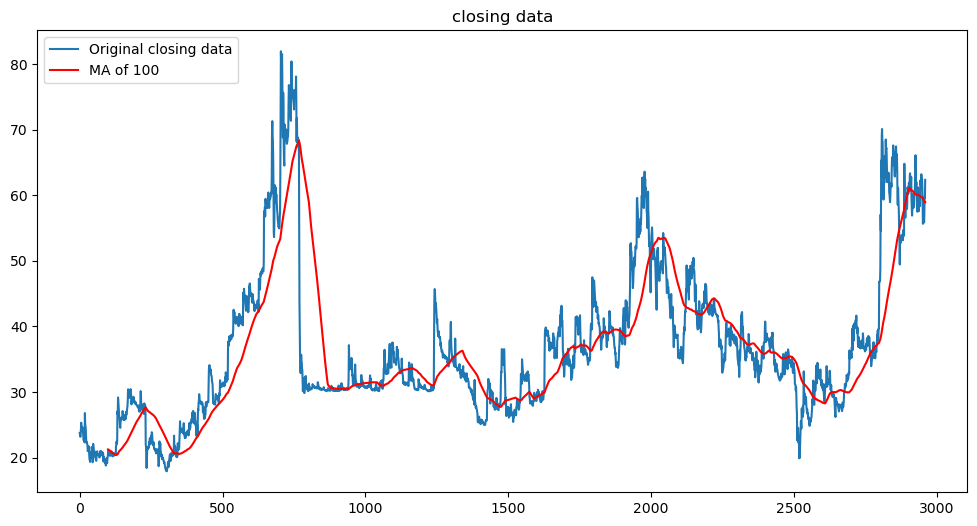

In [25]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.title("closing data")
plt.plot(ma100, "r")
plt.legend(["Original closing data", "MA of 100"],loc ="upper left")


In [20]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2955    55.37525
2956    55.46950
2957    55.57875
2958    55.68925
2959    55.81550
Name: Close, Length: 2960, dtype: float64

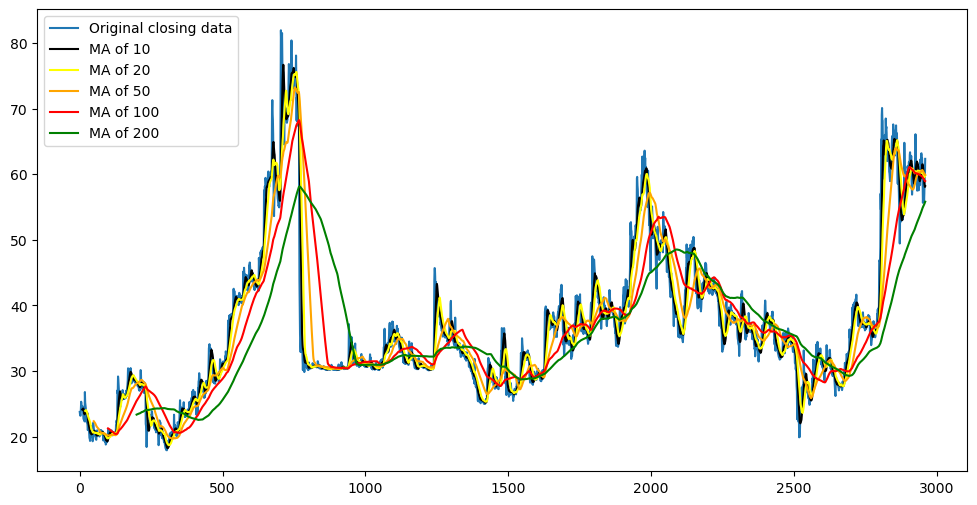

In [29]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma10, "black")
plt.plot(ma20, "yellow")
plt.plot(ma50, "orange")
plt.plot(ma100, "r")
plt.plot(ma200, "g")
plt.legend(["Original closing data","MA of 10","MA of 20","MA of 50","MA of 100","MA of 200"],loc ="upper left")

In [33]:
df.shape #shows rows and columns

(2960, 7)

In [34]:
#Splitting Data into Traning & Testing

data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_train.shape)
print(data_test.shape)

(2072, 1)
(888, 1)


In [35]:
data_train.head() #Data stating form '0' index

,Close
0,23.775000
1,23.400000
2,23.200001
3,23.200001
4,24.475000


In [36]:
data_test.head() #remaning 30% of data

,Close
2072,42.200001
2073,42.450001
2074,41.650002
2075,43.000000
2076,41.299999


In [37]:
from sklearn.preprocessing import MinMaxScaler #for the stacked LSTM model we have to scale down the data 
scalar = MinMaxScaler(feature_range=(0,1)) #scaling down the data between (0,1)

In [38]:
#Fitting the traning data into min-max scaler & also will be convertig into array

data_training_array = scalar.fit_transform(data_train) #scaler.fit_transform will automatically give an array
data_training_array 


array([[0.09137057],
       [0.08551348],
       [0.08238972],
       ...,
       [0.36743463],
       [0.42210078],
       [0.3689965 ]])

In [39]:
data_training_array.shape

(2072, 1)

In [40]:
#have to divide the data into x_train & y_train

x_train = []
y_train = []

#logic for predict the values

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i]) #added the values in x_train
    y_train.append(data_training_array[i, 0]) #added the values in y_train

x_train, y_train = np.array(x_train), np.array(y_train) #converting x_train & y_train into numpy arrays, so that we should be able to provide the data to LSTM

#dividing the dataset 
#x_train
#y_train

In [42]:
x_train.shape #100 coloums? how the 100 coloumns because we have define the step as 100 that means the first 100 values have become the coloumns because they have to act as the features for predecting my y_train so that y 100 will be in input_shape = 100 in my model

(1972, 100, 1)

In [43]:
#importing libs

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [44]:
#creating sequentual model
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,      
               input_shape = (x_train.shape[1],1))) #so why at 1 because the 100 is present at index '1' and '1' is nothing but the no. of colms & and it will change if working with 3 or 4 that no.will come in place of "1"
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))   


          
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1)) #1 is for closing only for no. of units just increase the no.


In [45]:
model.summary() #summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [46]:
model.compile(optimizer='adam', loss = 'mean_squared_error') #compiling the model 
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
62/62 [==============================] - 27s 271ms/step - loss: 0.0228
Epoch 2/50
62/62 [==============================] - 23s 371ms/step - loss: 0.0084
Epoch 3/50
62/62 [==============================] - 20s 326ms/step - loss: 0.0065
Epoch 4/50
62/62 [==============================] - 23s 373ms/step - loss: 0.0062
Epoch 5/50
62/62 [==============================] - 25s 409ms/step - loss: 0.0058
Epoch 6/50
62/62 [==============================] - 24s 388ms/step - loss: 0.0056
Epoch 7/50
62/62 [==============================] - 19s 313ms/step - loss: 0.0051
Epoch 8/50
62/62 [==============================] - 20s 322ms/step - loss: 0.0049
Epoch 9/50
62/62 [==============================] - 20s 327ms/step - loss: 0.0046
Epoch 10/50
62/62 [==============================] - 21s 330ms/step - loss: 0.0043
Epoch 11/50
62/62 [==============================] - 18s 288ms/step - loss: 0.0041
Epoch 12/50
62/62 [==============================] - 18s 298ms/step - loss: 0.0039
Epoch 13/50
6

In [47]:
model.save('keras_model.h5') #saving the model 

In [48]:
data_test.head() #testing data 

,Close
2072,42.200001
2073,42.450001
2074,41.650002
2075,43.000000
2076,41.299999


In [49]:
data_train.tail(100) #So these is the last'100' days data which i have to append with the Testing data so i should be able to predict the values to '99'days

,Close
1972,58.299999
1973,58.750000
1974,58.049999
1975,59.200001
1976,62.599998
...,...
2067,41.450001
2068,41.250000
2069,41.450001
2070,44.950001


In [50]:
past_100_days = data_train.tail(100)

In [51]:
final_df = past_100_days.append(data_test, ignore_index=True) #in past_100_days i have append the data testing so now last 100days dt & dt are connected

final_df.head()

C:\Users\Jaimin Shah\AppData\Local\Temp\ipykernel_14168\2385740392.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test, ignore_index=True) #in past_100_days i have append the data testing so now last 100days dt & dt are connected


,Close
0,58.299999
1,58.750000
2,58.049999
3,59.200001
4,62.599998


In [52]:
#so again i have to apply min-max sacaler cause this data is not scaled down

input_data = scalar.fit_transform(final_df)
input_data


array([[0.76494025],
       [0.77390441],
       [0.75996017],
       [0.78286857],
       [0.85059761],
       [0.87051793],
       [0.83167336],
       [0.8486056 ],
       [0.81772913],
       [0.82071713],
       [0.79482073],
       [0.79282873],
       [0.75298809],
       [0.74203193],
       [0.71314745],
       [0.69920321],
       [0.71613545],
       [0.80976097],
       [0.75199209],
       [0.72709169],
       [0.67529881],
       [0.64442233],
       [0.65438249],
       [0.64243033],
       [0.57071714],
       [0.55976098],
       [0.5039841 ],
       [0.58266937],
       [0.63944225],
       [0.67928289],
       [0.68625497],
       [0.70119521],
       [0.67828689],
       [0.64243033],
       [0.60458169],
       [0.61952193],
       [0.6065737 ],
       [0.60458169],
       [0.63645417],
       [0.61653386],
       [0.61155378],
       [0.60956177],
       [0.60258969],
       [0.57370522],
       [0.54382474],
       [0.5029881 ],
       [0.49501994],
       [0.451

In [53]:
input_data.shape

(988, 1)

In [54]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]): #the range will go till '630'
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0]) # it is the '0'th coloumn, that is closing price coloumn
    

In [55]:
x_test, y_test = np.array(x_test), np.array(y_test)#converting to numpy array
print(x_test.shape)
print(y_test.shape)

(888, 100, 1)
(888,)


In [56]:
#Making predictions 

y_predicated = model.predict(x_test)


28/28 [==============================] - 4s 88ms/step


In [59]:
y_predicated.shape

(888, 1)

In [60]:
y_test

array([0.44422314, 0.44920322, 0.43326698, 0.46015938, 0.42629482,
       0.39143426, 0.35856578, 0.33764939, 0.37549802, 0.4033865 ,
       0.40239042, 0.38844626, 0.38247011, 0.37051794, 0.36852594,
       0.36553786, 0.36653387, 0.36553786, 0.37450202, 0.37051794,
       0.37549802, 0.3545817 , 0.31573707, 0.30478091, 0.31274899,
       0.32071715, 0.31673307, 0.31175299, 0.30278883, 0.31075699,
       0.31673307, 0.33167331, 0.32569723, 0.33864546, 0.31573707,
       0.30278883, 0.31075699, 0.29880483, 0.29282867, 0.28884467,
       0.30876499, 0.35258963, 0.3814741 , 0.37749003, 0.39840642,
       0.38745019, 0.43426298, 0.44621514, 0.44422314, 0.47111554,
       0.51394426, 0.5049801 , 0.58565738, 0.54581674, 0.54083666,
       0.5547809 , 0.5278885 , 0.50796818, 0.51394426, 0.49601594,
       0.4820717 , 0.57370522, 0.52689242, 0.52689242, 0.54282874,
       0.58466138, 0.58366537, 0.58466138, 0.56175298, 0.54581674,
       0.54681274, 0.5537849 , 0.56474106, 0.59760961, 0.58167

In [61]:
y_predicated

array([[0.42725742],
       [0.43181702],
       [0.43255776],
       [0.42754543],
       [0.42509514],
       [0.420443  ],
       [0.40698725],
       [0.38570774],
       [0.36119387],
       [0.34540263],
       [0.34569126],
       [0.35730276],
       [0.37150377],
       [0.38064095],
       [0.37893012],
       [0.36961147],
       [0.35782915],
       [0.34833327],
       [0.3438321 ],
       [0.34465188],
       [0.34814975],
       [0.35225058],
       [0.3517227 ],
       [0.34218708],
       [0.3263257 ],
       [0.3099882 ],
       [0.2993669 ],
       [0.2974558 ],
       [0.30047888],
       [0.30265376],
       [0.3030933 ],
       [0.30296797],
       [0.30493087],
       [0.30764863],
       [0.31111795],
       [0.3116145 ],
       [0.30684242],
       [0.29964268],
       [0.29200643],
       [0.28507292],
       [0.27958143],
       [0.2792273 ],
       [0.2869913 ],
       [0.30219907],
       [0.32132253],
       [0.34118587],
       [0.3567562 ],
       [0.370

In [67]:
# so all the values are scale down, so again i have to scale-up the values 

scalar.scale_   #this will give me the factor by which all these valuse were scale down

array([0.01992032])

In [68]:
# so i need to divide my y_predicated and y_test value by this factor '0.00757604'

scale_factor = 1/0.01992032
y_predicated = y_predicated * scale_factor
y_test = y_test * scale_factor


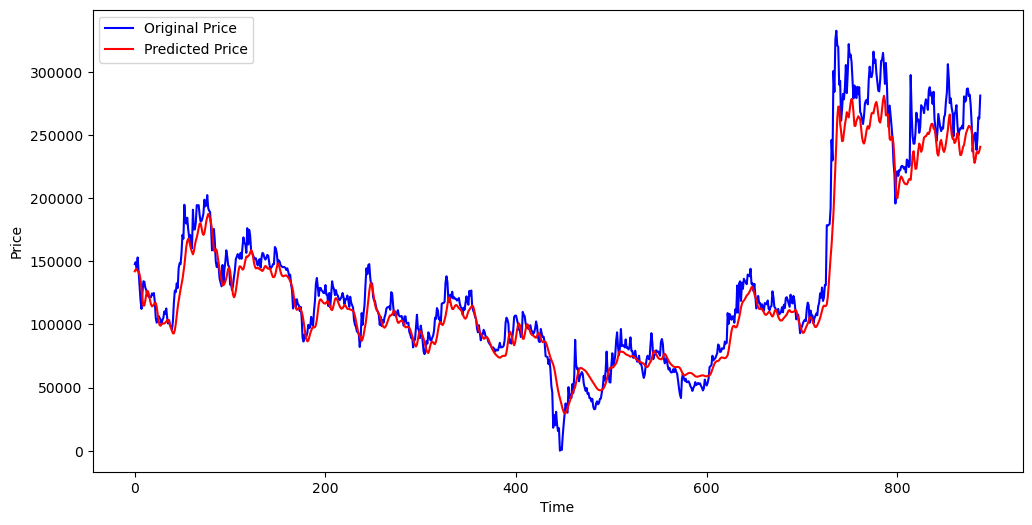

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicated, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()